# **Курсовой проект по вычислительной математике**

## 1. Постановка задачи
Сравнить численные решения, полученные по разностным схемам Лакса, Куранта–Изаксона–Риса, Лакса–Вендроффа, Уорминга–Кутлера–Ломакса для уравнения переноса в недивергентной и дивергентной формах:
$$ \frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0 $$
$$ \frac{\partial u}{\partial t} + \frac{\partial}{\partial x} \left( \frac{u^2}{2}\right) = 0 $$

Начальные профили:

![](images/profiles.png)

## 2. Начальные профили


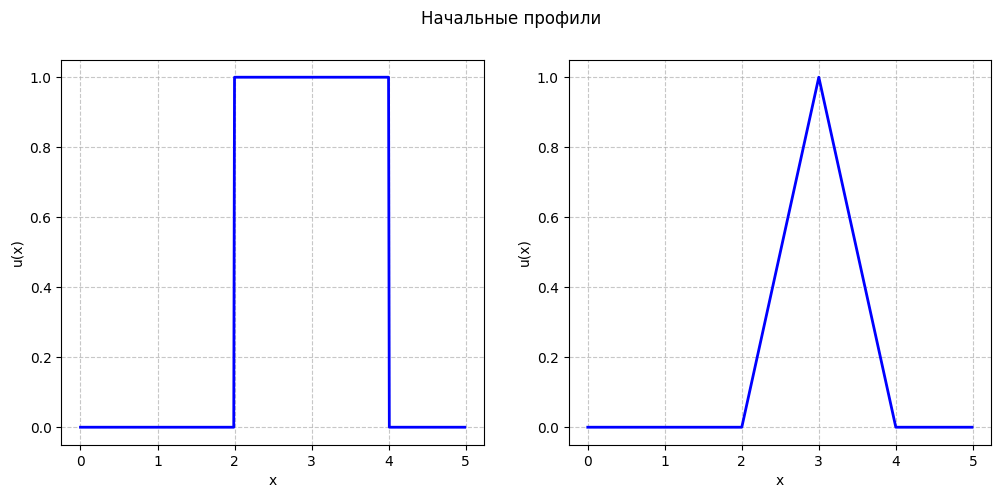

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Прямоугольник
def rectangle(x, height, L):
    if (L/2 <= x and x <= L):
        return height
    else:
        return 0

# Треугольник
def triangle(x, height, L):
    if (L/ 2 <= x and x <= 3*L/4):
        return x * height * 4/L - 2*height
    if(3*L/4 <= x and x <= L):
        return -x * height * 4/L + 4*height
    else:
        return 0

# Функция для построения графиков
def plot_start_profiles(x, y1, y2, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1.plot(x, y1, color='blue', linewidth=2)
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.set_xlabel("x")
    ax1.set_ylabel("u(x)")
    

    ax2.plot(x, y2, color='blue', linewidth=2)
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.set_xlabel("x")
    ax2.set_ylabel("u(x)")

    fig.suptitle(title)

    plt.show()

# Создание данных для начальных профилей
def start_profiles():
    x = np.arange(0, 5, 0.01)
    height = 1
    L = 4
    y_rect = []
    for i in x:
        y_rect.append(rectangle(i, height, L))
    y_triang = []
    for i in x:
        y_triang.append(triangle(i, height, L))
    
    return x, y_rect, y_triang

x, y_rect, y_triang = start_profiles()
plot_start_profiles(x, y_rect, y_triang, "Начальные профили")

# 3. Исследование прямоугольного профиля

### 3.1 Cхема Лакса

Схема Лакса имеет следующий шаблон:

![](images/lax_template.png)

Разностное уравнение, соответствующее недивергентному уравнению переноса:
$$\frac{u^{n+1}_{m} - 0.5\left( u^{n}_{m+1} + u^{n}_{m-1}\right)}{\tau} + u^{n}_{m} \frac{u^n_{m+1} - u^n_{m-1}}{2h} = 0$$

Разностное уравнение, соответствующее дивергентному уравнению переноса:
$$\frac{u^{n+1}_{m} - 0.5\left( u^{n}_{m+1} + u^{n}_{m-1}\right)}{\tau} + \frac{\left( u^n_{m+1} \right)^2 - \left(u^n_{m-1}\right)^2}{2 \cdot 2h} = 0$$

Порядок аппроксимации: $ O\left( \tau + h^2 + \frac{h^2}{\tau}\right)$

Схема является условно устойчивой: $$ \frac{\tau}{h} \cdot \max_{m}|u^{n}_{m}| \le 1 $$

Начальные условия:

In [36]:
x_start = 0
x_end = 10
t_start = 0
t_end = 1
h = 0.001

height = 1
L = 4

Реализация схемы Лакса для недивергентного уравнения переноса

In [37]:
def Lax_ndivergent(u_0, x_start, x_end, t_start, t_end, h):
    x = np.arange(x_start, x_end + h, h)
    u = []
    for i in x:
        u.append(u_0(i, height, L))

    u_new = u.copy()
    t_cur = t_start
    CFL = 0.9
    u_max = max(abs(elem) for elem in u)
    tau =  CFL * h / u_max

    while t_cur < t_end:
        # Определяем шаг по времени tau на основе условия Куранта
        u_max = max(abs(elem) for elem in u)
        while (tau * u_max / h > 1): 
            tau *= CFL

        for i in range(1, len(x) - 1):
            u_new[i] = 0.5 * (u[i+1] + u[i-1]) - (tau / (2 * h)) * u[i] * (u[i+1] - u[i-1])

        t_cur += tau
        u = u_new.copy()
    return x, u

Реализация схемы Лакса для дивергентного уравнения переноса

In [38]:
def Lax_divergent(u_0, x_start, x_end, t_start, t_end, h):
    x = np.arange(x_start, x_end + h, h)
    u = []
    for i in x:
        u.append(u_0(i, height, L))

    u_new = u.copy()
    t_cur = t_start
    CFL = 0.9
    u_max = max(abs(elem) for elem in u)
    tau =  CFL * h / u_max

    while t_cur < t_end:
        # Определяем шаг по времени tau на основе условия Куранта
        u_max = max(abs(elem) for elem in u)
        while (tau * u_max / h > 1): 
            tau *= CFL

        for i in range(1, len(x) - 1):
            u_new[i] = 0.5 * (u[i+1] + u[i-1]) - (tau / (4 * h)) * ((u[i+1])**2 - (u[i-1])**2)

        t_cur += tau
        u = u_new.copy()

    return x, u

Строим графики:

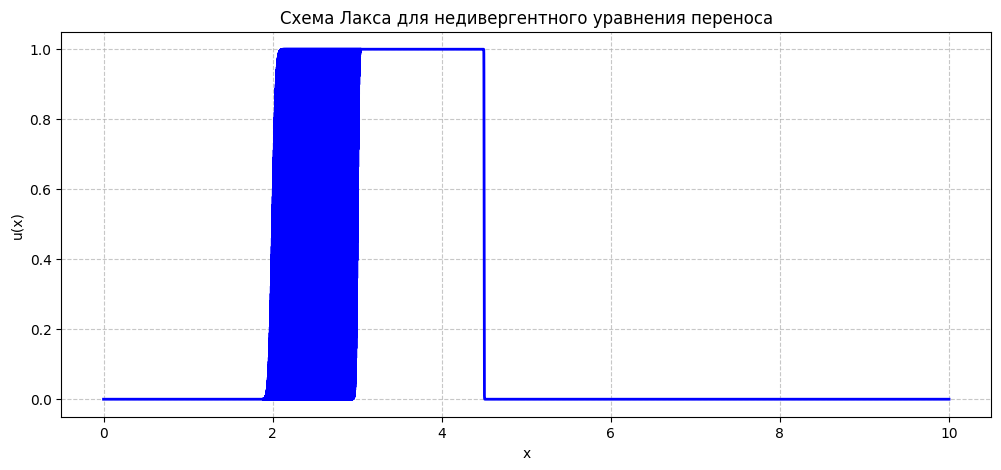

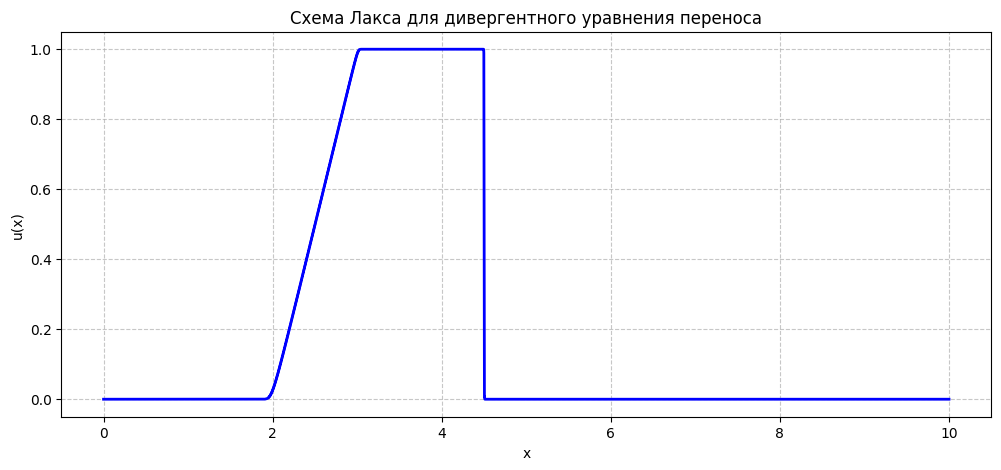

In [39]:
def plot_graph(x, y, title):
    plt.figure(figsize=(12, 5))
    plt.plot(x, y, color='blue', linewidth=2)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("u(x)")
    
    plt.show()

x_Lax_ndivergent, u_Lax_ndivergent = Lax_ndivergent(rectangle, x_start, x_end, t_start, t_end, h)
plot_graph(x_Lax_ndivergent, u_Lax_ndivergent, "Схема Лакса для недивергентного уравнения переноса")

x_Lax_divergent, u_Lax_divergent = Lax_divergent(rectangle, x_start, x_end, t_start, t_end, h)
plot_graph(x_Lax_divergent, u_Lax_divergent, "Схема Лакса для дивергентного уравнения переноса")

### 3.2 Cхема Куранта-Изаксона-Риса (КИР)

Схема КИР имеет следующий шаблон:

<img src="images/CIR_template.png" width="1000" />

Разностное уравнение, соответствующее недивергентному уравнению переноса:
$$\frac{u^{n+1}_{m} - u^{n}_{m}}{\tau} + u^{n}_{m} \frac{u^n_{m} - u^n_{m-1}}{h} = 0,\text{ при } u^{n}_{m} > 0 $$

$$\frac{u^{n+1}_{m} - u^{n}_{m}}{\tau} + u^{n}_{m} \frac{u^n_{m+1} - u^n_{m}}{h} = 0,\text{ при } u^{n}_{m} < 0 $$

Разностное уравнение, соответствующее дивергентному уравнению переноса:

$$\frac{u^{n+1}_{m} - u^{n}_{m}}{\tau} + \frac{\left(u^n_{m}\right)^2 - \left(u^n_{m - 1}\right)^2}{2 \cdot h} = 0,\text{ при } u^{n}_{m} > 0 $$

$$\frac{u^{n+1}_{m} - u^{n}_{m}}{\tau} + \frac{\left(u^n_{m+1}\right)^2 - \left(u^n_{m}\right)^2}{2 \cdot h} = 0,\text{ при } u^{n}_{m} < 0 $$

Порядок аппроксимации: $ O\left( \tau + h\right)$

Схема является условно устойчивой: $$ \frac{\tau}{h} \cdot \max_{m}|u^{n}_{m}| \le 1 $$


Реализация схемы КИР для недивергентного уравнения переноса:

In [40]:
def CIR_ndivergent(u_0, x_start, x_end, t_start, t_end, h):
    x = np.arange(x_start, x_end + h, h)
    u = []
    for i in x:
        u.append(u_0(i, height, L))

    u_new = u.copy()
    t_cur = t_start
    CFL = 0.9
    u_max = max(abs(elem) for elem in u)
    tau =  CFL * h / u_max

    while t_cur < t_end:
        # Определяем шаг по времени tau на основе условия Куранта
        u_max = max(abs(elem) for elem in u)
        while (tau * u_max / h > 1): 
            tau *= CFL

        for i in range(1, len(x) - 1):
            if u[i] >= 0:
                u_new[i] = u[i] - (tau / h) * u[i] * (u[i] - u[i-1])
            else:
                u_new[i] = u[i] - (tau / h) * u[i] * (u[i+1] - u[i])

        t_cur += tau
        u = u_new.copy()
    return x, u

Реализация схемы КИР для дивергентного уравнения переноса:

In [41]:
def CIR_divergent(u_0, x_start, x_end, t_start, t_end, h):
    x = np.arange(x_start, x_end + h, h)
    u = []
    for i in x:
        u.append(u_0(i, height, L))

    u_new = u.copy()
    t_cur = t_start
    CFL = 0.9
    u_max = max(abs(elem) for elem in u)
    tau =  CFL * h / u_max

    while t_cur < t_end:
        # Определяем шаг по времени tau на основе условия Куранта
        u_max = max(abs(elem) for elem in u)
        while (tau * u_max / h > 1): 
            tau *= CFL
        for i in range(1, len(x) - 1):
            if u[i] >= 0:
                u_new[i] = u[i] - (tau / (2*h)) * ((u[i])**2 - (u[i-1])**2)
            else:
                u_new[i] = u[i] - (tau / (2*h)) * ((u[i+1])**2 - (u[i])**2)

        t_cur += tau
        u = u_new.copy()
    return x, u

Строим графики:

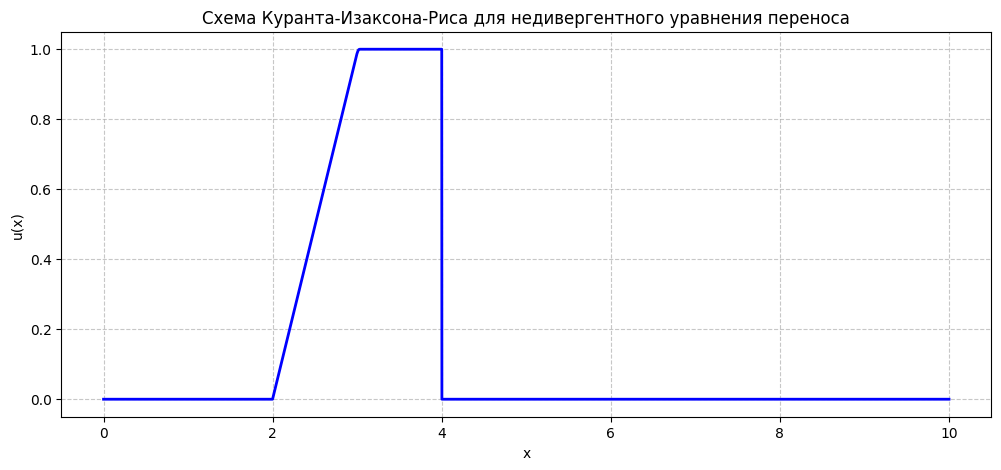

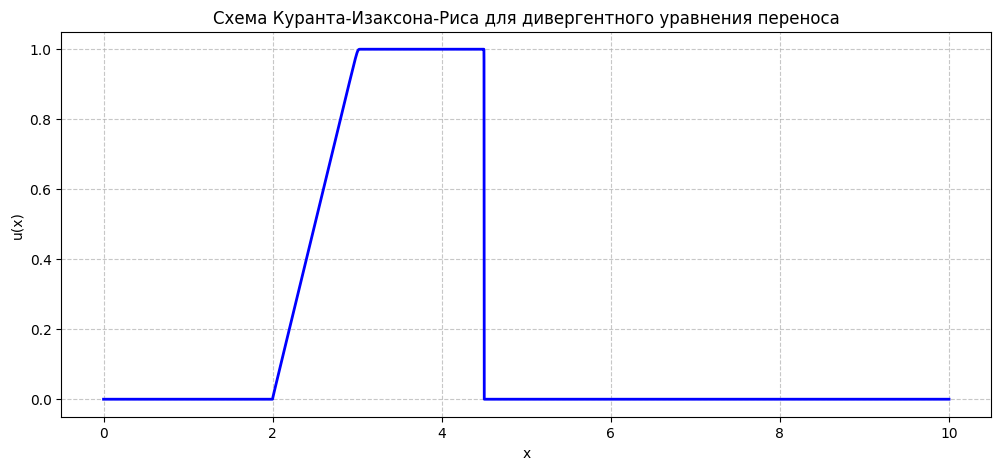

In [42]:
x_CIR_ndivergent, u_CIR_ndivergent = CIR_ndivergent(rectangle, x_start, x_end, t_start, t_end, h)
plot_graph(x_CIR_ndivergent, u_CIR_ndivergent, "Схема Куранта-Изаксона-Риса для недивергентного уравнения переноса")

x_CIR_divergent, u_CIR_divergent = CIR_divergent(rectangle, x_start, x_end, t_start, t_end, h)
plot_graph(x_CIR_divergent, u_CIR_divergent, "Схема Куранта-Изаксона-Риса для дивергентного уравнения переноса")

### 3.3 Cхема Лакса-Вендроффа

Схема Лакса-Вендроффа (или схема предиктор-корректор) для линейных уравнений с переменными коэффициентами становится более сложной, в отличие от случая постоянных коэффициентов. Для ее построения необходимо ввести полуцелые точки (точки с дробными индексами). На первом этапе (предиктора) значения в полуцелых точках вычисляются по следующей схеме — обобщению на  квазилинейный случай схемы Лакса:

Для недивергентного уравнения переноса имеем:

$$\frac{u^{n+1/2}_{m+1/2} - 0.5\left( u^{n}_{m+1} + u^{n}_{m}\right)}{\tau} + u^n_{m} \frac{ u^n_{m+1} - u^n_{m}}{2h} = 0$$

$$\frac{u^{n+1/2}_{m-1/2} - 0.5\left( u^{n}_{m} + u^{n}_{m-1}\right)}{\tau} + u^n_{m} \frac{u^n_{m} - u^n_{m-1}}{2h} = 0$$

На втором этапе (корректор) используется схема "чехарда":

$$\frac{u^{n+1}_{m} - u^{n}_{m}}{\tau} + u^n_{m} \frac{u^{n+1/2}_{m+1/2} - u^{n+1/2}_{m-1/2}}{h} = 0$$

В случае дивергентного уравнения переноса:
$$\frac{u^{n+1/2}_{m+1/2} - 0.5\left( u^{n}_{m+1} + u^{n}_{m}\right)}{\tau} + \frac{\left( u^n_{m+1} \right)^2 - \left(u^n_{m}\right)^2}{2 \cdot 2h} = 0$$

$$\frac{u^{n+1/2}_{m-1/2} - 0.5\left( u^{n}_{m} + u^{n}_{m-1}\right)}{\tau} + \frac{\left( u^n_{m} \right)^2 - \left(u^n_{m-1}\right)^2}{2 \cdot 2h} = 0$$

На втором этапе (корректор) используется схема "чехарда":

$$\frac{u^{n+1}_{m} - u^{n}_{m}}{\tau} + \frac{\left( u^{n+1/2}_{m+1/2} \right)^2 - \left(u^{n+1/2}_{m-1/2}\right)^2}{2h} = 0$$

Порядок аппроксимации: $ O\left( \tau^2 + h^2\right)$

Схема является условно устойчивой: $$ \frac{\tau}{h} \cdot \max_{m}|u^{n}_{m}| \le 1 $$


Реализация схемы Лакса-Вендроффа для недивергентного уравнения переноса:

In [43]:
def Lax_Wendroff_ndivergent(u_0, x_start, x_end, t_start, t_end, h):
    x = np.arange(x_start, x_end + h, h)
    u = []
    for i in x:
        u.append(u_0(i, height, L))

    u_new = u.copy()
    t_cur = t_start
    CFL = 0.9
    u_max = max(abs(elem) for elem in u)
    tau =  CFL * h / u_max

    while t_cur < t_end:
        # Определяем шаг по времени tau на основе условия Куранта
        u_max = max(abs(elem) for elem in u)
        while (tau * u_max / h > 1): 
            tau *= CFL
            
        for i in range(1, len(x) - 1):
            u_half_up = (u[i+1] + u[i])/2 - (tau / (2 * h)) * u[i] * (u[i+1] - u[i])
            u_half_down = (u[i] + u[i-1])/2 - (tau / (2 * h)) * u[i] * (u[i] - u[i-1])
            u_new[i] = u[i] - (tau / h) * u[i] * (u_half_up - u_half_down)

        t_cur += tau
        u = u_new.copy()
    return x, u

Реализация схемы Лакса-Вендроффа для дивергентного уравнения переноса:

In [44]:
def Lax_Wendroff_divergent(u_0, x_start, x_end, t_start, t_end, h):
    x = np.arange(x_start, x_end + h, h)
    u = []
    for i in x:
        u.append(u_0(i, height, L))

    u_new = u.copy()
    t_cur = t_start
    CFL = 0.9
    u_max = max(abs(elem) for elem in u)
    tau =  CFL * h / u_max
    while t_cur < t_end:
        # Определяем шаг по времени tau на основе условия Куранта
        u_max = max(abs(elem) for elem in u)
        while (tau * u_max / h > 1): 
            tau *= CFL

        for i in range(1, len(x) - 1):
            # Предиктор
            u_half_up = (u[i+1] + u[i])/2 - (tau / (4 * h)) * ((u[i+1])**2 - (u[i])**2)
            u_half_down = (u[i] + u[i-1])/2 - (tau / (4 * h)) * ((u[i])**2 - (u[i-1])**2)
            # Корректор
            u_new[i] = u[i] - (tau / (2*h)) * (u_half_up**2 - u_half_down**2)

        t_cur += tau
        u = u_new.copy()
    return x, u

Строим графики:

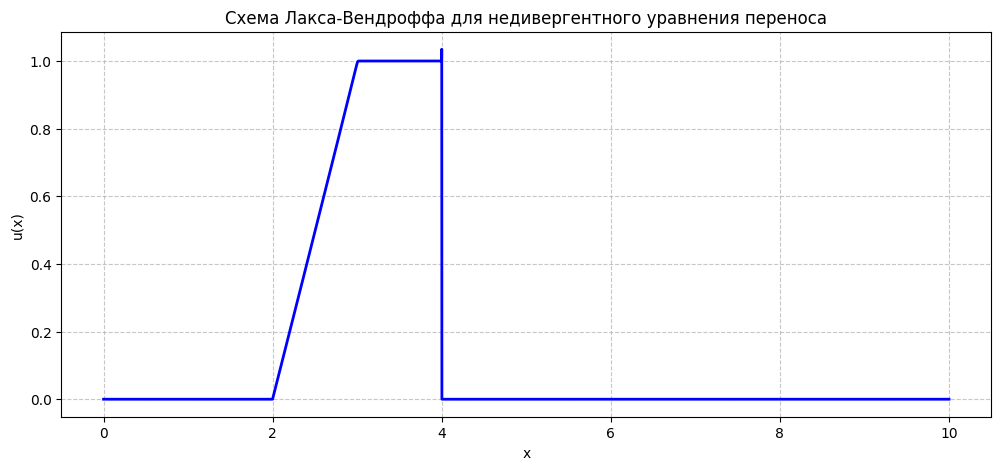

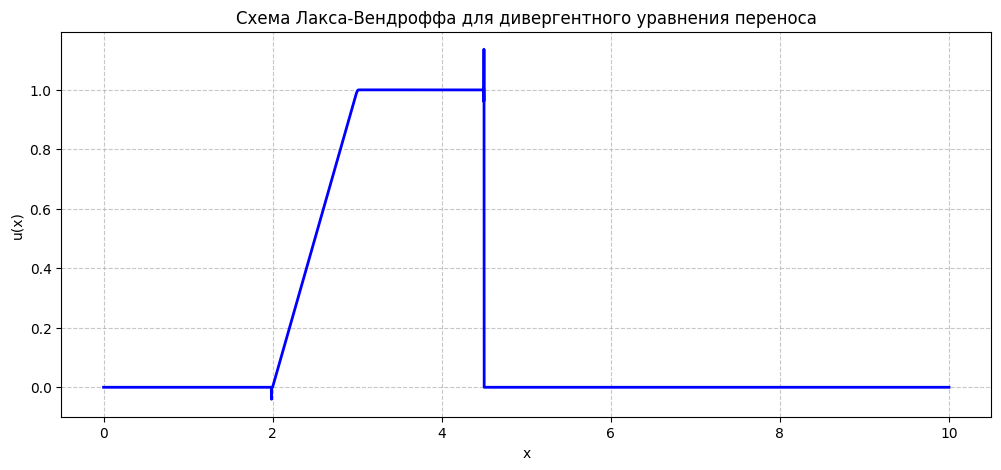

In [45]:
x_Lax_Wendroff_ndivergent, u_Lax_Wendroff_ndivergent = Lax_Wendroff_ndivergent(rectangle, x_start, x_end, t_start, t_end, h)
plot_graph(x_Lax_Wendroff_ndivergent, u_Lax_Wendroff_ndivergent, "Схема Лакса-Вендроффа для недивергентного уравнения переноса")

x_Lax_Wendroff_divergent, u_Lax_Wendroff_divergent = Lax_Wendroff_divergent(rectangle, x_start, x_end, t_start, t_end, h)
plot_graph(x_Lax_Wendroff_divergent, u_Lax_Wendroff_divergent, "Схема Лакса-Вендроффа для дивергентного уравнения переноса")

### 3.4 Cхема Уорминга-Кутлера-Ломакса

Cхема Уорминга-Кутлера-Ломакса реализуется в 3 этапа: предиктор, корректор, стабилизация

Для дивергентного уравнения переноса имеем:

1-й этап (предиктор):
$$
\frac{u_{m+1}^{n+1/3} - u_{m+1}^n}{2\tau/3} + \frac{ \left(u_{m+2}^n \right)^2 - \left( u_{m+1}^n \right)^2}{2h} = 0,
$$
$$
\frac{u_{m}^{n+1/3} - u_m^n}{2\tau/3} + \frac{ \left(u_{m+1}^n \right)^2 - \left( u_{m}^n \right)^2}{2h} = 0,
$$
$$
\frac{u_{m-1}^{n+1/3} - u_{m-1}^n}{2\tau/3} + \frac{\left(u_{m}^n \right)^2 - \left( u_{m-1}^n \right)^2}{2h} = 0.
$$

$$
\frac{u_{m-2}^{n+1/3} - u_{m-2}^n}{2\tau/3} + \frac{\left(u_{m-1}^n \right)^2 - \left( u_{m-2}^n \right)^2}{2h} = 0.
$$

2-й этап (корректор):

$$
\frac{u_{m+1}^{n+2/3} - 0.5\left(u_{m+1}^n + u_{m+1}^{n+1/3}\right)}{2\tau/3} + \frac{\left( u_{m+1}^{n+1/3} \right)^2 - \left( u_{m}^{n+1/3} \right)^2}{2 \cdot 2h} = 0.
$$

$$
\frac{u_{m-1}^{n+2/3} - 0.5\left(u_{m-1}^n + u_{m-1}^{n+1/3}\right)}{2\tau/3} + \frac{\left( u_{m-1}^{n+1/3} \right)^2 - \left( u_{m-2}^{n+1/3} \right)^2}{2 \cdot 2h} = 0,
$$

3-й этап (стабилизация):
$$
\frac{u_{m}^{n+1} - u_m^n}{\tau} + \frac{3}{8} \frac{\left( u_{m+1}^{n+2/3} \right)^2 - \left( u_{m-1}^{n+2/3} \right)^2}{2 \cdot h} + \frac{-2\left(u_{m+2}^n\right)^2 + 7\left( u_{m+1}^n\right)^2 - 7\left(u_{m-1}^n\right)^2 + 2\left(u_{m-1}^n\right)^2}{2 \cdot 24h} + $$
$$
 + \frac{\omega}{24}\left(u_{m+2}^n - 4u_{m+1}^n + 6u_m^n - 4u_{m-1}^n + u_{m-2}^n\right) = 0, \quad \omega = const.
$$

Последнее слагаемое в разностной формуле, описывающей третий шаг схемы, является конечно-разностной аппроксимацией слагаемого с четвертой производной $ u_{xxxx} \left(x_1 – x_2 \right)^4$,  дополнительно введенного для
обеспечения устойчивости схемы.

Порядок аппроксимации: $ O\left( \tau^3 + h^3\right)$

Схема является условно устойчивой: $$ 4r^2 - r^4 < \omega < 3, \text{ где }r = \frac{\tau}{h} \cdot \max_{m}|u^{n}_{m}|$$

Реализация схемы Уорминга-Кутлера-Ломакса для дивергентного уравнения переноса:

In [48]:
def WKL_divergent(u_0, x_start, x_end, t_start, t_end, h):
    x = np.arange(x_start, x_end + h, h)
    u = []
    for i in x:
        u.append(u_0(i, height, L))

    u_new = u.copy()
    t_cur = t_start
    r = 0.9
    omega = 2.7 # Взято, исходя из того, что r = 0.9
    u_max = max(abs(elem) for elem in u)
    tau =  r * h / u_max
    while t_cur < t_end:
        # Определяем шаг по времени tau на основе условия Куранта
        u_max = max(abs(elem) for elem in u)
        while (4 * r**2 - r**4 >= omega): 
            tau *= 0.9
            r *= 0.9

        for i in range(2, len(x) - 2):
            # Предиктор
            u_pred_p_one = u[i+1] - (tau / (3 * h)) * ((u[i+2])**2 - (u[i+1])**2)
            u_pred_zero = u[i] - (tau / (3 * h)) * ((u[i+1])**2 - (u[i])**2)
            u_pred_m_one = u[i-1] - (tau / (3 * h)) * ((u[i])**2 - (u[i-1])**2)
            u_pred_m_two = u[i-2] - (tau / (3 * h)) * ((u[i-1])**2 - (u[i-2])**2)
            # Корректор
            u_corr_up = 0.5 * (u[i+1] + u_pred_p_one) - (tau / (6 * h)) * (u_pred_p_one**2 -  u_pred_zero**2)
            u_corr_down = 0.5 * (u[i-1] + u_pred_m_one) - (tau / (6 * h)) * (u_pred_m_one**2 -  u_pred_m_two**2)
            # Стабилизация
            u_new[i] = u[i] - ((3 * tau) / (16 * h)) * (u_corr_up - u_corr_down) * (u_corr_up + u_corr_down) - (tau / (48 * h)) * (-2 * (u[i+2])**2 + 7 * (u[i+1])**2 - 7 * (u[i-1])**2 + 2 * (u[i-2])**2) - (omega / 24) * (u[i+2] - 4 * u[i+1] + 6 * u[i] -4 * u[i-1] + u[i-2])

        t_cur += tau
        u = u_new.copy()
    return x, u

In [49]:
def WKL_ndivergent(u_0, x_start, x_end, t_start, t_end, h):
    x = np.arange(x_start, x_end + h, h)
    u = []
    for i in x:
        u.append(u_0(i, height, L))

    u_new = u.copy()
    t_cur = t_start
    r = 0.9
    omega = 2.7 # Взято, исходя из того, что r = 0.9
    u_max = max(abs(elem) for elem in u)
    tau =  r * h / u_max
    while t_cur < t_end:
        # Определяем шаг по времени tau на основе условия Куранта
        u_max = max(abs(elem) for elem in u)
        while (4 * r**2 - r**4 >= omega): 
            tau *= 0.9
            r *= 0.9

        for i in range(2, len(x) - 2):
            # Предиктор
            u_pred_p_one = u[i+1] - (tau / (3 * h)) * ((u[i+2])**2 - (u[i+1])**2)
            u_pred_zero = u[i] - (tau / (3 * h)) * ((u[i+1])**2 - (u[i])**2)
            u_pred_m_one = u[i-1] - (tau / (3 * h)) * ((u[i])**2 - (u[i-1])**2)
            u_pred_m_two = u[i-2] - (tau / (3 * h)) * ((u[i-1])**2 - (u[i-2])**2)
            # Корректор
            u_corr_up = 0.5 * (u[i+1] + u_pred_p_one) - (tau / (6 * h)) * (u_pred_p_one**2 -  u_pred_zero**2)
            u_corr_down = 0.5 * (u[i-1] + u_pred_m_one) - (tau / (6 * h)) * (u_pred_m_one**2 -  u_pred_m_two**2)
            # Стабилизация
            u_new[i] = u[i] - ((3 * tau) / (16 * h)) * (u_corr_up - u_corr_down) * (u_corr_up + u_corr_down) - (tau / (48 * h)) * (-2 * (u[i+2])**2 + 7 * (u[i+1])**2 - 7 * (u[i-1])**2 + 2 * (u[i-2])**2) - (omega / 24) * (u[i+2] - 4 * u[i+1] + 6 * u[i] -4 * u[i-1] + u[i-2])

        t_cur += tau
        u = u_new.copy()
    return x, u

Строим графики:

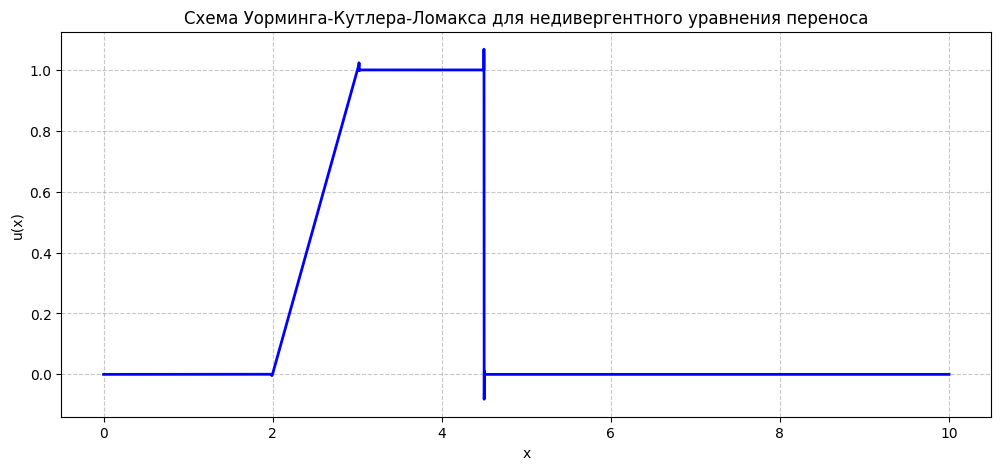

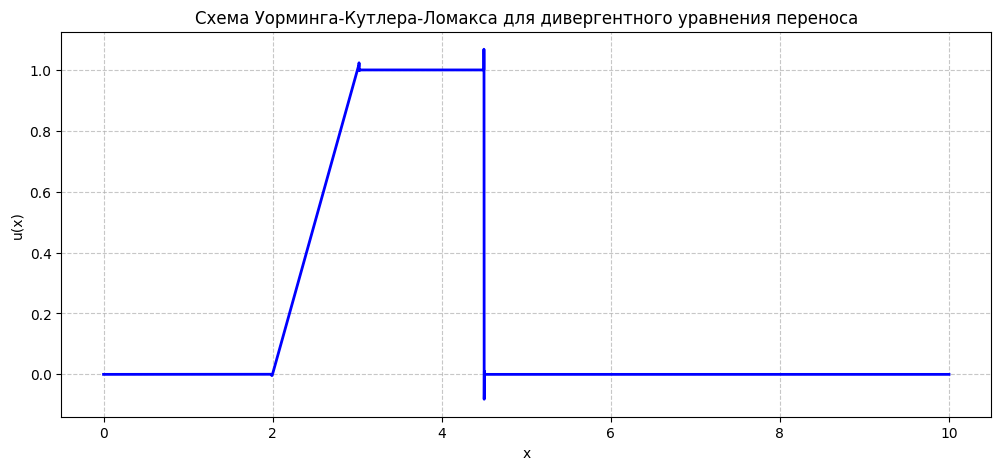

In [50]:
x_WKL_ndivergent, u_WKL_ndivergent = WKL_ndivergent(rectangle, x_start, x_end, t_start, t_end, h)
plot_graph(x_WKL_ndivergent, u_WKL_ndivergent, "Схема Уорминга-Кутлера-Ломакса для недивергентного уравнения переноса")

x_WKL_divergent, u_WKL_divergent = WKL_divergent(rectangle, x_start, x_end, t_start, t_end, h)
plot_graph(x_WKL_divergent, u_WKL_divergent, "Схема Уорминга-Кутлера-Ломакса для дивергентного уравнения переноса")